In [1]:
import pandas as pd
X_full = pd.read_csv('main_data.csv')
X_full.head()

,region,address,price,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,...,longitude,latitude,passenger_elevator,cargo_elevator,metro,metro_distance,metro_transport,district,is_apartments,is_auction
0,msk,"Москва, Большой Толмачёвский переулок",1996610000,459.4,81.4,173.3,5.0,7,8,NaN,...,37.620949,55.739757,1.0,1.0,"Полянка,Новокузнецкая,Третьяковская","6,10,4","walk,walk,transport","Якиманка,ЦАО",0.0,0
1,msk,"Москва, Самотечная ул., 5",66970000,160.0,25.0,119.0,3.0,3,9,1892.0,...,37.618318,55.775165,1.0,1.0,"Цветной бульвар,Достоевская,Сухаревская","6,9,13","walk,walk,walk","Тверской,ЦАО",NaN,1
2,msk,"Москва, Ильинка",378820000,157.4,41.1,50.7,3.0,3,5,NaN,...,37.623649,55.755140,NaN,NaN,"Площадь Революции,Театральная","3,6","walk,walk","Тверской,ЦАО",0.0,0
3,msk,"Москва, М. Бронная ул., 32",110500000,110.5,15.0,61.0,3.0,2,6,1912.0,...,37.593524,55.764197,1.0,0.0,"Маяковская,Пушкинская,Тверская","10,10,10","walk,walk,walk","Пресненский,ЦАО",NaN,1
4,msk,"Москва, Ильинка",1031300000,271.8,57.1,123.8,5.0,5,5,NaN,...,37.623509,55.755201,NaN,NaN,"Площадь Революции,Театральная","3,6","walk,walk","Тверской,ЦАО",0.0,0


In [2]:
X_full.describe()

,price,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,isСomplete,complitation_year,balcony,longitude,latitude,passenger_elevator,cargo_elevator,is_apartments,is_auction
count,5.978000e+03,5978.000000,3702.000000,3834.000000,5248.000000,5978.000000,5978.000000,1497.000000,3797.000000,3869.000000,1405.00000,5978.000000,5978.000000,3254.000000,2693.000000,5040.000000,5978.000000
mean,2.958911e+07,66.546173,14.366667,33.818258,2.102515,7.840248,16.875878,1999.291917,0.134317,2024.574309,0.80000,50.760080,56.604465,2.464352,2.580765,0.063492,0.238207
std,8.822499e+07,59.392769,10.142335,33.068501,1.043265,7.354915,9.565322,31.715727,0.341037,1.351384,0.69839,17.221261,1.593255,3.030908,3.267750,0.243870,0.426022
min,1.697000e+06,12.000000,1.000000,2.100000,1.000000,-2.000000,1.000000,1770.000000,0.000000,2013.000000,0.00000,29.514256,54.856743,0.000000,0.000000,0.000000,0.000000
25%,6.495618e+06,38.615000,8.000000,16.000000,1.000000,3.000000,9.000000,1985.000000,0.000000,2024.000000,0.00000,37.565079,55.731537,1.000000,1.000000,0.000000,0.000000
50%,9.248100e+06,53.185000,12.700000,26.600000,2.000000,5.000000,17.000000,2013.000000,0.000000,2025.000000,1.00000,44.075142,56.219562,2.000000,1.000000,0.000000,0.000000
75%,1.802593e+07,73.852500,17.900000,39.900000,3.000000,11.000000,24.000000,2020.000000,0.000000,2025.000000,1.00000,60.603778,56.819113,3.000000,3.000000,0.000000,0.000000
max,2.455020e+09,1285.800000,168.700000,700.000000,6.000000,82.000000,95.000000,2026.000000,1.000000,2028.000000,4.00000,83.123521,60.194665,30.000000,30.000000,1.000000,1.000000


In [3]:
X_full = X_full[X_full.price < X_full.price.quantile(q=0.95)]

In [4]:
X_train = X_full.drop('price', axis=1) 

In [5]:
Y = X_full['price']

C:\Users\Борис\AppData\Local\Temp\ipykernel_6868\338656433.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_full['price'])


<Axes: xlabel='price', ylabel='Density'>

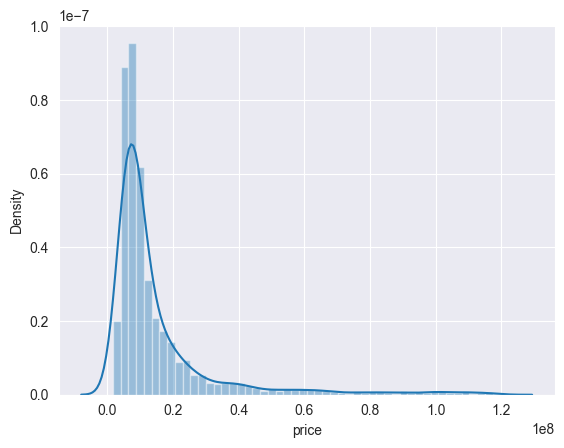

In [6]:
import seaborn as sns

sns.distplot(X_full['price'])

In [7]:
X_full['region'].value_counts()

region
ekb    1000
nsk    1000
nng    1000
kzn     977
spb     956
msk     745
Name: count, dtype: int64

In [8]:
X_full.shape

(5678, 26)

In [9]:
X_train.isna().sum()

region                   0
address                  0
total_area               0
kitchen_area          2183
living_area           2012
rooms_count            723
floor                    0
floors_number            0
build_date            4340
isСomplete            1929
complitation_year     1859
house_material         564
parking               4435
decoration            4484
balcony               4359
longitude                0
latitude                 0
passenger_elevator    2618
cargo_elevator        3057
metro                  858
metro_distance         858
metro_transport        858
district                17
is_apartments          877
is_auction               0
dtype: int64

Очень много пропущенно данных(больше половины) в колонках: parking, decoration, balcony, build_date

In [10]:
X_train['rooms_count'] = X_train['rooms_count'].fillna(1.0)

По количеству комнат поиграться посмотреть с каким заполнителем будет лучше.
Данные по площади кухни и по жилой площади можно заполнить медианным значением или средним(посмотреть на распределение)

C:\Users\Борис\AppData\Local\Temp\ipykernel_6868\46938732.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['total_area'])


<Axes: xlabel='total_area', ylabel='Density'>

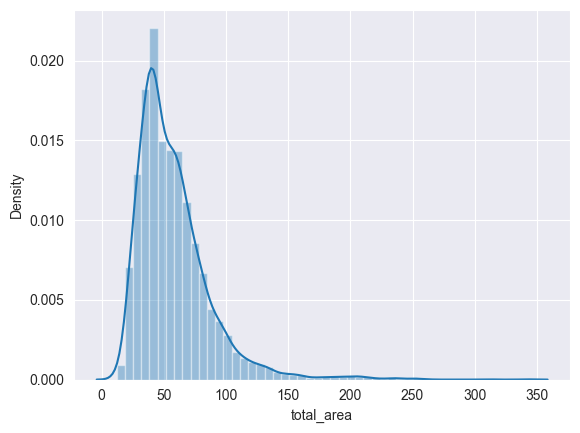

In [11]:
sns.distplot(X_train['total_area'])

In [12]:
X_train['kitchen_area'] = X_train['kitchen_area'].fillna(X_train['kitchen_area'].mean())

In [13]:
X_train['living_area'] = X_train['living_area'].fillna(X_train['living_area'].mean())

In [14]:
X_train.isna().sum()

region                   0
address                  0
total_area               0
kitchen_area             0
living_area              0
rooms_count              0
floor                    0
floors_number            0
build_date            4340
isСomplete            1929
complitation_year     1859
house_material         564
parking               4435
decoration            4484
balcony               4359
longitude                0
latitude                 0
passenger_elevator    2618
cargo_elevator        3057
metro                  858
metro_distance         858
metro_transport        858
district                17
is_apartments          877
is_auction               0
dtype: int64

In [15]:
X_train.describe()

,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,isСomplete,complitation_year,balcony,longitude,latitude,passenger_elevator,cargo_elevator,is_apartments,is_auction
count,5678.000000,5678.000000,5678.00000,5678.000000,5678.000000,5678.000000,1338.000000,3749.000000,3819.000000,1319.000000,5678.000000,5678.000000,3060.000000,2621.000000,4801.000000,5678.000000
mean,57.822135,13.311845,29.68617,1.864213,7.845720,17.132617,1998.227205,0.132569,2024.589421,0.782411,51.511036,56.617309,2.498366,2.611599,0.058113,0.206763
std,29.909592,5.891554,15.70269,0.911468,7.145964,9.325511,32.374063,0.339153,1.317789,0.686169,17.338544,1.597258,3.058063,3.264580,0.233981,0.405020
min,12.000000,1.000000,2.10000,1.000000,-2.000000,1.000000,1770.000000,0.000000,2013.000000,0.000000,29.514256,54.856743,0.000000,0.000000,0.000000,0.000000
25%,38.000000,10.600000,20.10000,1.000000,3.000000,9.000000,1982.000000,0.000000,2024.000000,0.000000,37.580422,55.731936,1.000000,1.000000,0.000000,0.000000
50%,51.500000,13.311845,29.68617,2.000000,5.000000,17.000000,2012.500000,0.000000,2025.000000,1.000000,49.096911,56.266072,2.000000,1.000000,0.000000,0.000000
75%,69.890000,14.200000,29.80000,2.000000,11.000000,24.000000,2021.000000,0.000000,2025.000000,1.000000,60.612492,56.821564,3.000000,3.000000,0.000000,0.000000
max,342.580000,88.000000,194.80000,6.000000,72.000000,85.000000,2026.000000,1.000000,2028.000000,4.000000,83.123521,60.194665,30.000000,30.000000,1.000000,1.000000


Ниже пример расчёта расстояния между объектами

In [16]:
from geopy.distance import geodesic

# Предположим, что у вас есть координаты двух объектов
location1 = (55.739757, 37.620949) #Москва, Большой Толмачёвский переулок
location2 = (55.752004, 37.617734) #Кремль

# Расчет удаленности между объектами
distance = geodesic(location1, location2).meters
distance

1378.41432362998

In [17]:
X_train = X_train.drop(columns={'address', 'district'}, axis=1)

In [18]:
X_train['balcony'].value_counts() #Как может быть значение 2,3 или 4...Возможно количество балконов

balcony
1.0    801
0.0    426
2.0     57
3.0     23
4.0     12
Name: count, dtype: int64

Дата начала постройки неизвестна в половине данных, нужно посмотреть что там с датой сдачи

In [19]:
X_train['complitation_year'].isna().sum()

1859

C:\Users\Борис\AppData\Local\Temp\ipykernel_6868\3367358660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['complitation_year'])


<Axes: xlabel='complitation_year', ylabel='Density'>

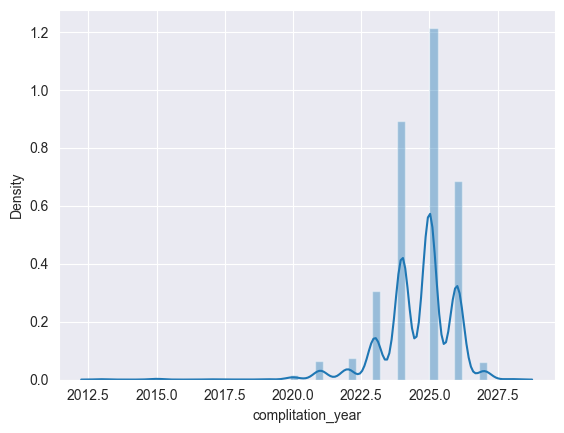

In [20]:
sns.distplot(X_train['complitation_year'])

In [21]:
X_train['build_date'] = X_train['build_date'].fillna(2025)

In [22]:
X_train['complitation_year'] = X_train['complitation_year'].fillna(2023)

In [23]:
import numpy as np
mean = np.mean(X_train['complitation_year'])
median = np.nanmedian(X_train['complitation_year'])
mean, median

(2024.0690383938006, 2024.0)

In [24]:
X_train['isСomplete'].value_counts()

isСomplete
0.0    3252
1.0     497
Name: count, dtype: int64

In [25]:
# Заполнение пропусков в столбце isComplete
# Подумать над заполнением пустых данных
# Если дата постройки дома (build_date) < 2024, то дом построен
X_train.loc[X_train['build_date'].astype(int) < 2024, 'isСomplete'] = 1
# Если дата окончания строительства (complitation_year) > 2024, то дом не построен
X_train.loc[X_train['complitation_year'].astype(int) > 2024, 'isСomplete'] = 0

print('После:', X_train['isСomplete'].value_counts())

После: isСomplete
0.0    3271
1.0    1813
Name: count, dtype: int64


In [26]:
X_train.loc[X_train['build_date'].astype(int) >= X_train['complitation_year'].astype(int), 'isСomplete'] = 0

In [27]:
most_value_count = X_train['house_material'].value_counts().index[0]
most_value_count

'monolithBrick'

In [28]:
X_train['house_material'] = X_train['house_material'].fillna(most_value_count)

In [29]:
X_train = X_train.drop(columns={'metro', 'metro_distance', 'metro_transport','decoration', 'balcony', 'parking'}, axis=1)

По сути всеьколонки связанные с метро можно удалить, так как будем использовать нашу идею, связанную с растояниями. Также стоит удалить признак связанный с балконом из за недостаточности данных, слишком много пропусков, востанавливать бессмысленно, такая же ситуация с парковкой. Данную ситуацию стоит посмотреть уже на большом датасете

In [30]:
X_train.loc[X_train['floors_number'].astype(int) > 5, 'passenger_elevator'] = 1
X_train.loc[X_train['floors_number'].astype(int) <= 5, 'passenger_elevator'] = 0

Стоит поискать нормативные документы по поводу того с какого количества этажей лифт становится обязательным

In [31]:
X_train.loc[X_train['floors_number'].astype(int) > 5, 'cargo_elevator'] = 1
X_train.loc[X_train['floors_number'].astype(int) <= 5, 'cargo_elevator'] = 0

In [32]:
X_train['is_apartments'] = X_train['is_apartments'].fillna(0.0)

In [33]:
X_train.isna().sum()

region                0
total_area            0
kitchen_area          0
living_area           0
rooms_count           0
floor                 0
floors_number         0
build_date            0
isСomplete            0
complitation_year     0
house_material        0
longitude             0
latitude              0
passenger_elevator    0
cargo_elevator        0
is_apartments         0
is_auction            0
dtype: int64

Теперь можно применять OHE и выкатывать модель

In [34]:
X_train.head()

,region,total_area,kitchen_area,living_area,rooms_count,floor,floors_number,build_date,isСomplete,complitation_year,house_material,longitude,latitude,passenger_elevator,cargo_elevator,is_apartments,is_auction
1,msk,160.0,25.000000,119.00000,3.0,3,9,1892.0,1.0,2023.0,brick,37.618318,55.775165,1.0,1.0,0.0,1
3,msk,110.5,15.000000,61.00000,3.0,2,6,1912.0,1.0,2023.0,brick,37.593524,55.764197,1.0,1.0,0.0,1
10,msk,127.0,13.311845,29.68617,3.0,3,7,2025.0,0.0,2022.0,monolithBrick,37.623959,55.747611,1.0,1.0,1.0,0
14,msk,62.3,23.700000,29.68617,2.0,8,9,2025.0,0.0,2022.0,monolith,37.594868,55.771088,1.0,1.0,1.0,0
18,msk,49.8,13.311845,27.90000,2.0,9,17,2025.0,0.0,2026.0,monolith,37.571184,55.715275,1.0,1.0,0.0,0


In [35]:
X_train = pd.get_dummies(X_train, dtype=int)

In [36]:
from sklearn.model_selection import train_test_split
X_trained, X_val, y_trained, y_val = train_test_split(X_train, Y, test_size=0.2, random_state=42)

In [37]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.inspection import permutation_importance

# Train the LightGBM model
model = lgb.LGBMRegressor()
model.fit(X_trained, y_trained)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring='neg_root_mean_squared_error', n_repeats=100, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X_trained.columns[sorted_indices[:15]]  # Most 15 importend feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1507
[LightGBM] [Info] Number of data points in the train set: 4542, number of used features: 26
[LightGBM] [Info] Start training from score 15190790.342580
total_area: 8363758.972536442
region_msk: 6525251.175740945
latitude: 2687143.592490634
longitude: 2303608.887035642
floors_number: 869442.4512734739
build_date: 667685.2804861142
floor: 148411.74388950993
rooms_count: 148078.4159365944
complitation_year: 116045.99590701117
house_material_monolithBrick: 95246.06496854508
house_material_brick: 88699.42852209277
kitchen_area: 60525.71643798403
is_auction: 47491.540046693146
house_material_monolith: 42613.141432015036
is_apartments: 22137.990474968337


In [38]:
X_trained = X_trained[top_features]
X_val = X_val[top_features]

In [39]:
X_trained.head()

,total_area,region_msk,latitude,longitude,floors_number,build_date,floor,rooms_count,complitation_year,house_material_monolithBrick,house_material_brick,kitchen_area,is_auction,house_material_monolith,is_apartments
1358,23.66,0,60.030357,30.202671,14,2022.0,12,1.0,2023.0,1,0,13.311845,1,0,0.0
968,93.00,1,55.718060,37.496650,14,2021.0,12,4.0,2023.0,0,0,14.000000,1,1,0.0
4418,42.70,0,55.824739,49.155408,18,2013.0,17,1.0,2023.0,0,1,11.900000,0,0,0.0
892,48.00,1,55.794173,37.542213,37,2021.0,37,1.0,2023.0,0,0,6.000000,1,1,0.0
4941,83.69,0,55.780573,49.106999,9,2025.0,7,3.0,2024.0,1,0,20.700000,0,0,0.0


In [40]:
#import necessary libraries
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor



#define objective function for hyperparameter optimization using optuna
def objective(trial):

  #define hyperparameters to optimize for
  params = {
      'max_depth': trial.suggest_int('max_depth', 1, 10),
      'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0),
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
      'gamma': trial.suggest_float('gamma', 0.01, 1.0),
      'subsample': trial.suggest_float('subsample', 0.01, 1.0),
      'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
      'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
      'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
  }

  model = XGBRegressor(**params, random_state=42)
    
  #evaluate model using cross-validation
  score = cross_val_score(model, X_trained, y_trained, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-20 15:15:54,334] A new study created in memory with name: no-name-8264e71d-540a-40e2-bb75-422fcd1f44db
[I 2024-03-20 15:15:55,302] Trial 0 finished with value: 0.8609090565058046 and parameters: {'max_depth': 5, 'learning_rate': 0.6375506229002812, 'n_estimators': 333, 'min_child_weight': 26, 'gamma': 0.03691327564049769, 'subsample': 0.7377791580181476, 'colsample_bytree': 0.39834936838690554, 'reg_alpha': 0.7708467100708962, 'reg_lambda': 0.36367479933692165}. Best is trial 0 with value: 0.8609090565058046.
[I 2024-03-20 15:15:55,847] Trial 1 finished with value: 0.7976613988408905 and parameters: {'max_depth': 9, 'learning_rate': 0.8603202460194583, 'n_estimators': 122, 'min_child_weight': 53, 'gamma': 0.20783935170880216, 'subsample': 0.4654502333612659, 'colsample_bytree': 0.4612066125901339, 'reg_alpha': 0.7073639972552201, 'reg_lambda': 0.4339986805365463}. Best is trial 0 with value: 0.8609090565058046.
[I 2024-03-20 15:15:58,599] Trial 2 finished with value: 0.88011

In [41]:
#get best hyperparameters
best_params = study.best_params
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: {'max_depth': 6, 'learning_rate': 0.06299239706016307, 'n_estimators': 954, 'min_child_weight': 16, 'gamma': 0.09994661992443382, 'subsample': 0.9402701246764145, 'colsample_bytree': 0.4917166324016908, 'reg_alpha': 0.7841717132757329, 'reg_lambda': 0.32474041310731316}


In [42]:
model = XGBRegressor(**best_params, random_state=42)

In [43]:
#fit and predict using model
model.fit(X_trained, y_trained)
predictions = model.predict(X_val)


In [56]:
import xgboost as xgb
model.save_model("model1.json")

In [54]:
model2 = xgb.XGBRegressor()
model2.load_model("model.json")
predictions = model2.predict(X_val)
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
print('MAE:', mean_absolute_error(y_val, predictions))
print('R^2:', r2_score(y_val, predictions))
print('MAPE:', mean_absolute_percentage_error(y_val, predictions))
print('RMSE:', (mean_squared_error(y_val, predictions)) ** (1/2))

MAE: 2686892.3056778167
R^2: 0.8814571966393812
MAPE: 0.15530908450675326
RMSE: 6321837.372706397


In [55]:
X_val

,total_area,region_msk,latitude,longitude,floors_number,build_date,floor,rooms_count,complitation_year,house_material_monolithBrick,house_material_brick,kitchen_area,is_auction,house_material_monolith,is_apartments
1418,128.50,0,60.011558,30.328067,11,1999.0,3,3.0,2023.0,0,1,13.000000,1,0,0.0
1206,65.70,0,59.916234,30.487374,9,1971.0,3,3.0,2023.0,0,0,10.500000,1,0,0.0
2079,72.90,0,56.849955,60.612492,31,2025.0,16,3.0,2025.0,1,0,16.700000,0,0,0.0
4063,36.90,0,55.753914,49.204555,9,1974.0,6,1.0,2023.0,0,0,7.000000,1,0,0.0
5261,50.80,0,56.232644,43.952653,5,2025.0,5,2.0,2023.0,0,0,6.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,86.80,1,55.734334,37.525324,34,2025.0,10,3.0,2023.0,0,0,13.311845,0,1,1.0
5938,94.80,0,56.310719,44.003461,9,2025.0,2,3.0,2026.0,1,0,30.700000,0,0,0.0
3945,46.95,0,55.068875,82.915132,20,2025.0,3,2.0,2026.0,1,0,7.300000,0,0,0.0
2441,26.60,0,56.776187,60.665259,16,2025.0,9,1.0,2023.0,1,0,13.311845,0,0,0.0


In [52]:
model2 = xgb.XGBRegressor()
model2.load_model("model.json")

In [51]:
X_trained

,total_area,region_msk,latitude,longitude,floors_number,build_date,floor,rooms_count,complitation_year,house_material_monolithBrick,house_material_brick,kitchen_area,is_auction,house_material_monolith,is_apartments
1358,23.66,0,60.030357,30.202671,14,2022.0,12,1.0,2023.0,1,0,13.311845,1,0,0.0
968,93.00,1,55.718060,37.496650,14,2021.0,12,4.0,2023.0,0,0,14.000000,1,1,0.0
4418,42.70,0,55.824739,49.155408,18,2013.0,17,1.0,2023.0,0,1,11.900000,0,0,0.0
892,48.00,1,55.794173,37.542213,37,2021.0,37,1.0,2023.0,0,0,6.000000,1,1,0.0
4941,83.69,0,55.780573,49.106999,9,2025.0,7,3.0,2024.0,1,0,20.700000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,63.35,0,55.815119,49.136229,18,2016.0,7,2.0,2023.0,0,1,13.000000,1,0,0.0
5491,49.00,0,56.262945,43.975145,18,2025.0,7,1.0,2025.0,1,0,13.311845,0,0,0.0
5526,40.00,0,56.286767,43.988200,18,2025.0,17,1.0,2023.0,0,0,11.400000,0,1,0.0
5690,68.64,0,56.296689,43.949214,24,2025.0,22,2.0,2026.0,1,0,18.600000,0,0,0.0


In [49]:
X_val.columns

Index(['total_area', 'region_msk', 'latitude', 'longitude', 'floors_number',
       'build_date', 'floor', 'rooms_count', 'complitation_year',
       'house_material_monolithBrick', 'house_material_brick', 'kitchen_area',
       'is_auction', 'house_material_monolith', 'is_apartments'],
      dtype='object')

In [50]:
X_val

,total_area,region_msk,latitude,longitude,floors_number,build_date,floor,rooms_count,complitation_year,house_material_monolithBrick,house_material_brick,kitchen_area,is_auction,house_material_monolith,is_apartments
1418,128.50,0,60.011558,30.328067,11,1999.0,3,3.0,2023.0,0,1,13.000000,1,0,0.0
1206,65.70,0,59.916234,30.487374,9,1971.0,3,3.0,2023.0,0,0,10.500000,1,0,0.0
2079,72.90,0,56.849955,60.612492,31,2025.0,16,3.0,2025.0,1,0,16.700000,0,0,0.0
4063,36.90,0,55.753914,49.204555,9,1974.0,6,1.0,2023.0,0,0,7.000000,1,0,0.0
5261,50.80,0,56.232644,43.952653,5,2025.0,5,2.0,2023.0,0,0,6.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,86.80,1,55.734334,37.525324,34,2025.0,10,3.0,2023.0,0,0,13.311845,0,1,1.0
5938,94.80,0,56.310719,44.003461,9,2025.0,2,3.0,2026.0,1,0,30.700000,0,0,0.0
3945,46.95,0,55.068875,82.915132,20,2025.0,3,2.0,2026.0,1,0,7.300000,0,0,0.0
2441,26.60,0,56.776187,60.665259,16,2025.0,9,1.0,2023.0,1,0,13.311845,0,0,0.0


In [44]:
predictions

array([47430496. , 12328422. , 13426976. , ...,  7847946.5,  3996406. ,
        6305892. ], dtype=float32)

In [45]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
print('MAE:', mean_absolute_error(y_val, predictions))
print('R^2:', r2_score(y_val, predictions))
print('MAPE:', mean_absolute_percentage_error(y_val, predictions))
print('RMSE:', (mean_squared_error(y_val, predictions)) ** (1/2))

MAE: 2686892.3056778167
R^2: 0.8814571966393812
MAPE: 0.15530908450675326
RMSE: 6321837.372706397
